In [21]:
import pandas as pd
import numpy as np

## Loading dataset

In [63]:
df= pd.read_csv('NewsArticles_Top10Keywords.csv')
df.tail()

,news_id,title,content,link,date
10636,10637,Rocwise’s Soldiers of the Universe shows a Tur...,Soldiers of the Universe isn&#8217;t pretty \u...,https://venturebeat.com/?p=2302950,2017-12-13
10637,10638,Trump signs U.S. government ban on Kaspersky L...,(Reuters) &#8212; President Donald Trump signe...,https://venturebeat.com/?p=2303361,2017-12-13
10638,10639,Nvidia partners with Japan’s Komatsu to make c...,Japanese construction equipment manufacturer K...,https://venturebeat.com/?p=2302735,2017-12-13
10639,10640,Google launches AI Center in China,Google today announced plans to launch the Goo...,https://venturebeat.com/?p=2303370,2017-12-13
10640,10641,"The $177,843.34 Facebook ad test: Collection v...",GUEST: Facebook launched its Collection ad for...,https://venturebeat.com/?p=2302547,2017-12-13


In [146]:
df.link.value_counts()

link
http://venturebeat.com/?p=2141494     1
https://venturebeat.com/?p=2260691    1
https://venturebeat.com/?p=2260453    1
https://venturebeat.com/?p=2260583    1
https://venturebeat.com/?p=2260676    1
                                     ..
https://venturebeat.com/?p=2216678    1
https://venturebeat.com/?p=2217102    1
https://venturebeat.com/?p=2216713    1
https://venturebeat.com/?p=2217420    1
https://venturebeat.com/?p=2302547    1
Name: count, Length: 10567, dtype: int64

In [64]:
df.drop_duplicates(subset=['link'], inplace=True)

In [65]:
df['text']= df['title']+ '. '+ df['content']

In [66]:
df['len']= [len(x.split()) for x in df['text']]

In [67]:
df['len'].describe()

count    10567.000000
mean        64.852087
std          5.193618
min         19.000000
25%         64.000000
50%         66.000000
75%         67.000000
max         87.000000
Name: len, dtype: float64

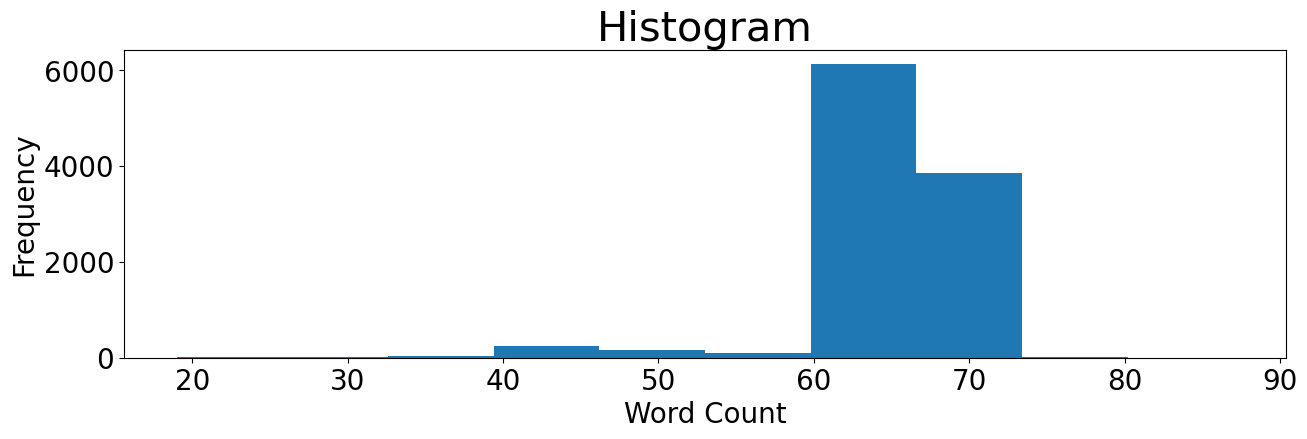

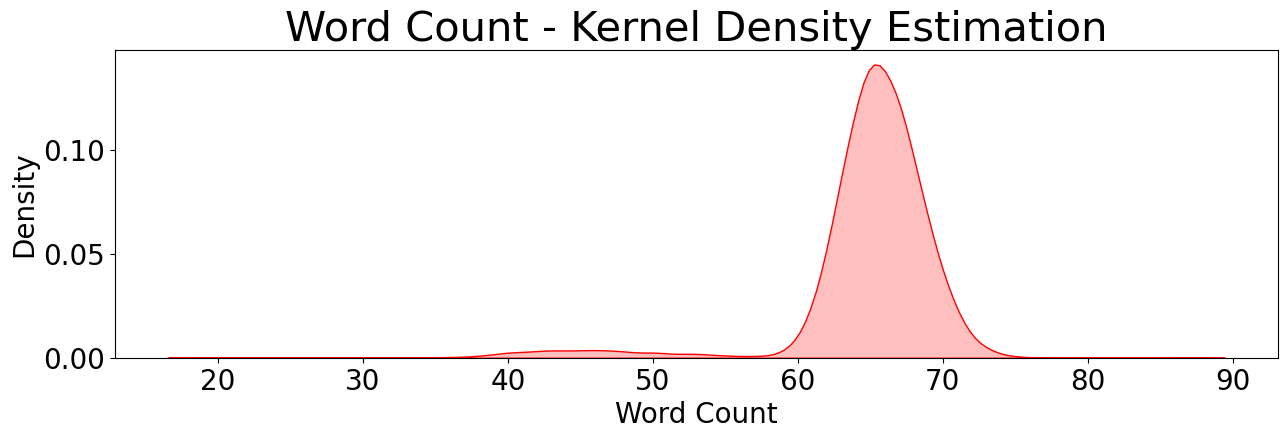

In [79]:
# Import library
import seaborn as sns
import matplotlib.pyplot as plt
# Create a new column of word counts
df['word_count'] = df['text'].str.split().str.len()
# Histogram
fig = plt.figure(figsize=(15, 4))             # Size
plt.hist(df['word_count'] )                   # Plot
plt.rcParams['font.size'] = 20                # Font size
plt.ylabel("Frequency", fontsize = 20)        # Y label
plt.xlabel("Word Count", fontsize = 20)       # X label
plt.title("Histogram", fontsize = 30)         # Title
plt.show()
# Kernel Density Plot
fig = plt.figure(figsize=(15, 4))             # Size
ax = sns.kdeplot(df['word_count'],            # Plot
         color = "Red", fill = True)
ax.set_ylabel("Density", fontsize = 20)       # Y label
ax.set_xlabel("Word Count", fontsize = 20)    # X label
plt.title(
    "Word Count - Kernel Density Estimation", 
    fontsize = 30)                            #title
plt.show()

In [80]:
x= df.sample(n=1).iloc[0]
print('title:')
print(x.title)
print('content:')
print(x.content)
print('combined:')
print(x.text)

title:
MomentFeed raises $16.3 million to help brands with social media marketing
content:
MomentFeed, which helps companies tailor and manage their marketing strategies, announced today a funding round of $16.3 million. The Santa Monica, Calif.-based startup provides software that centralizes all of a brand&#8217;s social media accounts onto a single dashboard-like page.\xa0From there, brands can manage, post, reply, and advertise from that one page, without having to logon&#160;[&#8230;]\n
combined:
MomentFeed raises $16.3 million to help brands with social media marketing. MomentFeed, which helps companies tailor and manage their marketing strategies, announced today a funding round of $16.3 million. The Santa Monica, Calif.-based startup provides software that centralizes all of a brand&#8217;s social media accounts onto a single dashboard-like page.\xa0From there, brands can manage, post, reply, and advertise from that one page, without having to logon&#160;[&#8230;]\n


In [27]:
# import nltk
# from nltk.corpus import stopwords
# # nltk.download('stopwords')
# from nltk.tokenize import word_tokenize, sent_tokenize

In [72]:
len(df)//5

2113

## using nltk for finding top keywords words

Preprocessing: Combined title and content. Removed stopwords, punctuation, alphanumeric characters. 
    
Assumption: The most significant keywords are expected to be drawn from parts of speech associated with nouns, pronouns, and adjectives.
    
Top words definition: After cleaning the Words/n-grams with high tfidf scores are considered to be top keywords.

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample list of documents
documents = [x.text for x in df.itertuples()]
# Initialize NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v.veerati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\v.veerati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\v.veerati\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [199]:
def preprocess_documents(documents):
    # Tokenize and preprocess the documents(removed stopwords, punctuations and alphanumeric characters)
    document_tokens = []
    for document in documents:
        words = word_tokenize(document)
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        document_tokens.append(" ".join(words))
    filtered_tokens = []
    # Perform POS tagging and filter by desired tags
    for doc_tokens in document_tokens:
        tagged_words = nltk.pos_tag(word_tokenize(doc_tokens))
        filtered_words = [word for word, pos in tagged_words if pos in ['NN', 'NNS', 'NNP', 'NNPS', 'PRP', 'PRP$', 'JJ', 'JJR', 'JJS']]
        filtered_tokens.append(" ".join(filtered_words))
    return(filtered_tokens)

In [200]:
filtered_tokens= preprocess_documents(documents)

In [201]:
filtered_tokens[:5]

['chatbots productive guest slack burst workplace scene employees way send email worse chat coworker thanks handful messaging platforms businesses teams',
 'spanish social advertising company adsmurai social advertising company second round funding venture capital firm partners group participation banc sabadell program enisa spanish financing group elena antonio robles specializes',
 'htc vive ces people htc vive love unit wish new version key improvements design lighter cord face ergonomic controllers grip buttons top early adopter wish list htc relies',
 'chinese firms pay disney pixar copying cars reuters shanghai court chinese firms disney co pixar yuan compensation copying parts movies cars cars official xinhua news agency saturday ruling latest slew intellectual property wins large',
 'aws growth database migrations public market leader amazon web services offers services popular others question core computing service storage service popular aws parent company sales numbers']

In [166]:
total_text =' '.join(filtered_tokens)
total_title_text =' '.join(filtered_tokens)

## Word cloud of top words-- title only

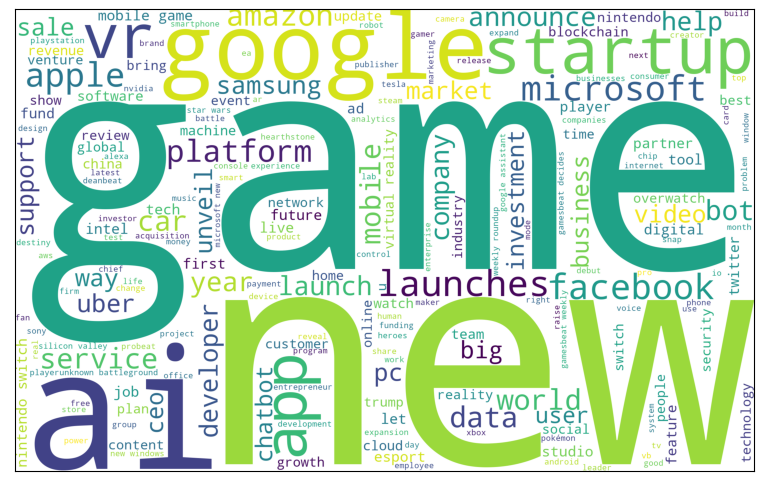

In [203]:
## word cloud on title keyowrds
filtered_tokens_title= preprocess_documents([x.title for x in df.itertuples()])
total_title_text =' '.join(filtered_tokens_title)
# Import library
from wordcloud import WordCloud
from collections import Counter
# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
lease_wc = wc.generate(total_title_text)
plt.xticks([])
plt.yticks([])
plt.imshow(lease_wc);

## Word cloud of top words-- whole text

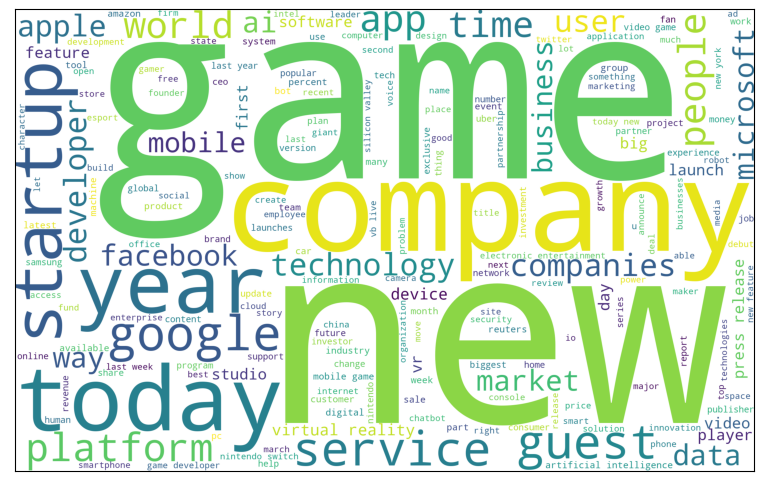

In [170]:
# Import library
from wordcloud import WordCloud
from collections import Counter
# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
lease_wc = wc.generate(total_text)
plt.xticks([])
plt.yticks([])
plt.imshow(lease_wc);

##  fitting tfidf and calculating importance

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [185]:
def fit_tfidf(filtered_tokens, n_gram_start=1, n_gram_stop=1, min_df=0.0, max_df=1.0, top_k=10):
    # Create a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(n_gram_start, n_gram_stop), min_df=min_df, max_df=max_df)
    
    # Fit and transform the vectorizer on the combined text
    tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_tokens)

    # Get the feature names (words/terms)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Calculate the TF-IDF scores
    tfidf_scores = tfidf_matrix.toarray()

    # Sum the TF-IDF scores over all documents to get the importance of each term across the entire dataset
    term_importance = tfidf_scores.sum(axis=0)

    # Create a list of (term, importance) pairs
    term_importance_pairs = [(term, importance) for term, importance in zip(feature_names, term_importance)]

    # Sort the pairs by importance in descending order
    term_importance_pairs.sort(key=lambda x: x[1], reverse=True)

    # Get the top 10 keywords
    top_keywords = term_importance_pairs[:top_k]
    return top_keywords

In [190]:
def plot_keyword_importances(top_keywords, k, types):
    keywords_df = pd.DataFrame(top_keywords, columns=["Keyword", "Importance"])

    # Sort the DataFrame by importance in descending order (optional but useful for plotting)
    keywords_df = keywords_df.sort_values(by="Importance", ascending=False)

    # Plot the top keywords
    plt.figure(figsize=(10, 6))
    plt.barh(keywords_df["Keyword"], keywords_df["Importance"])
    plt.xlabel("Importance Score")
    plt.ylabel("Keyword")
    plt.title("Top {} {} by Importance".format(k, types))
    plt.gca().invert_yaxis()  # Invert the y-axis to display the most important keywords at the top
    plt.show()

## top keywords by tfidf importance

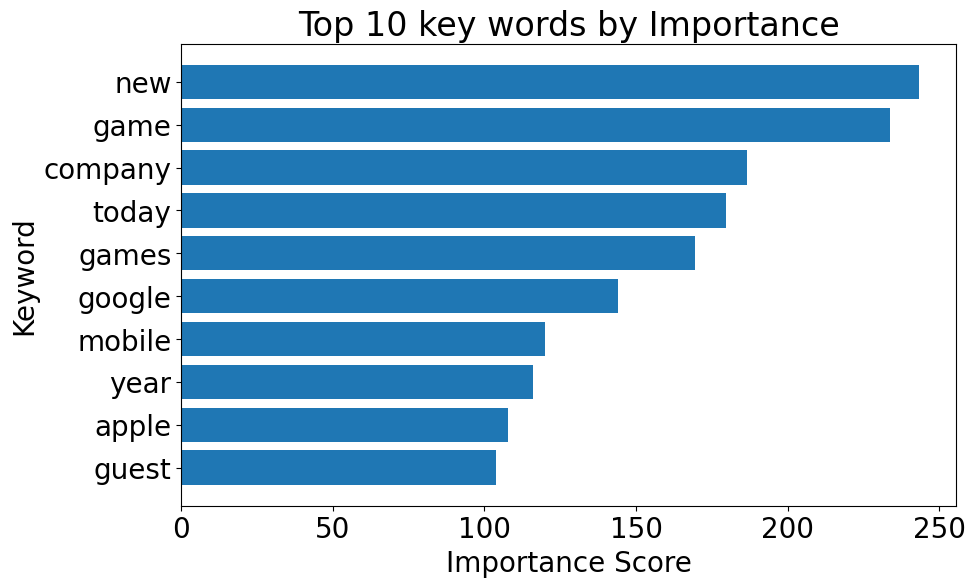

In [191]:
top_keywords= fit_tfidf(filtered_tokens, n_gram_start=1, n_gram_stop=1, min_df=0.0, max_df=1.0, top_k=10)
plot_keyword_importances(top_keywords, 10, 'key words')

# restricting tfidf vectorizer to constraint high and low volume words

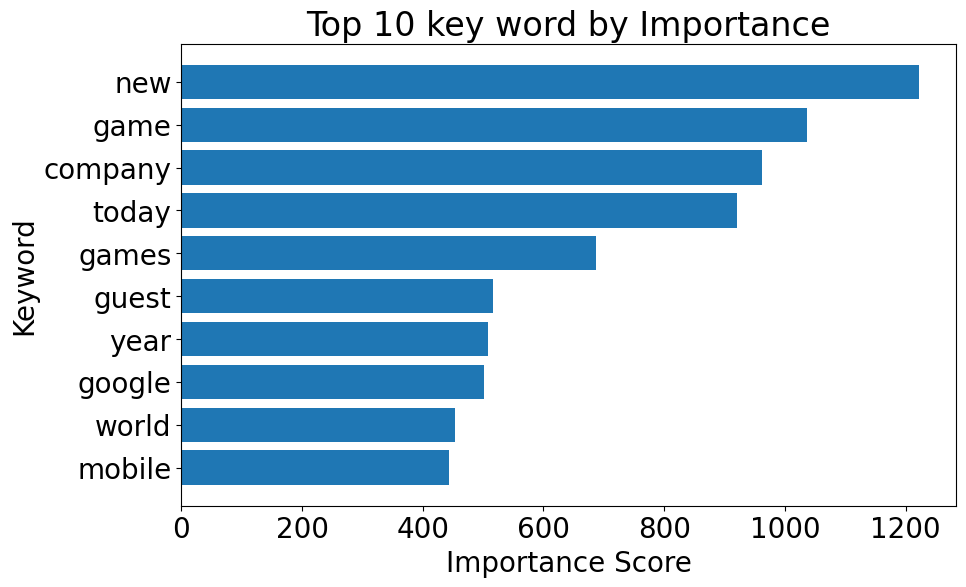

In [194]:
top_keywords= fit_tfidf(filtered_tokens, min_df=0.05, max_df=0.95, top_k=10)
plot_keyword_importances(top_keywords, 10, 'key word')

## 2-gram top key phrase

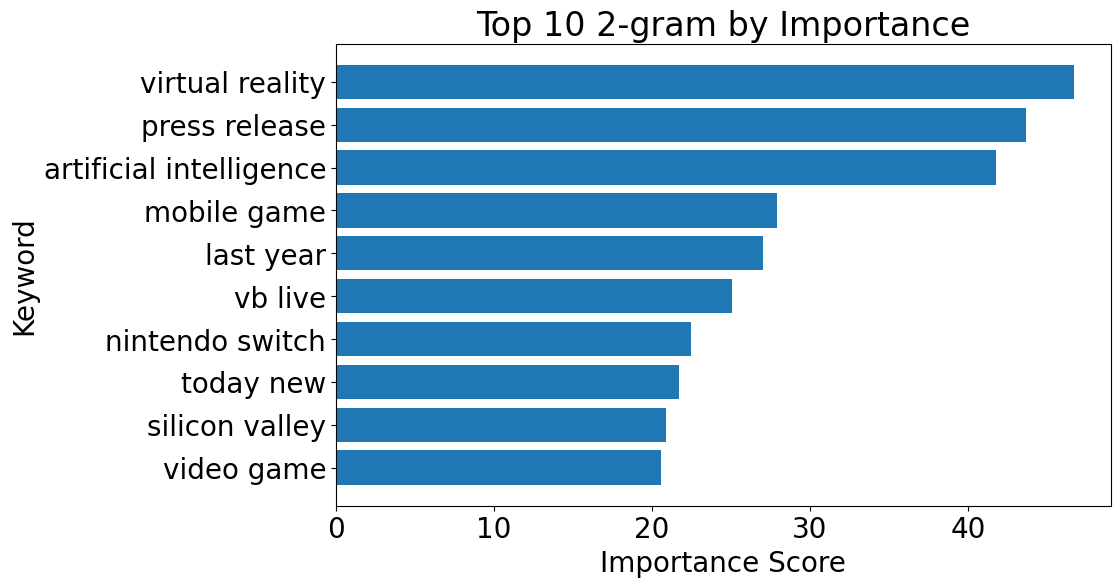

In [196]:
top_keywords= fit_tfidf(filtered_tokens, n_gram_start=2, n_gram_stop=2, min_df=0.0, max_df=1.0, top_k=10)
plot_keyword_importances(top_keywords, 10, '2-gram')

## 3-gram top key phrase

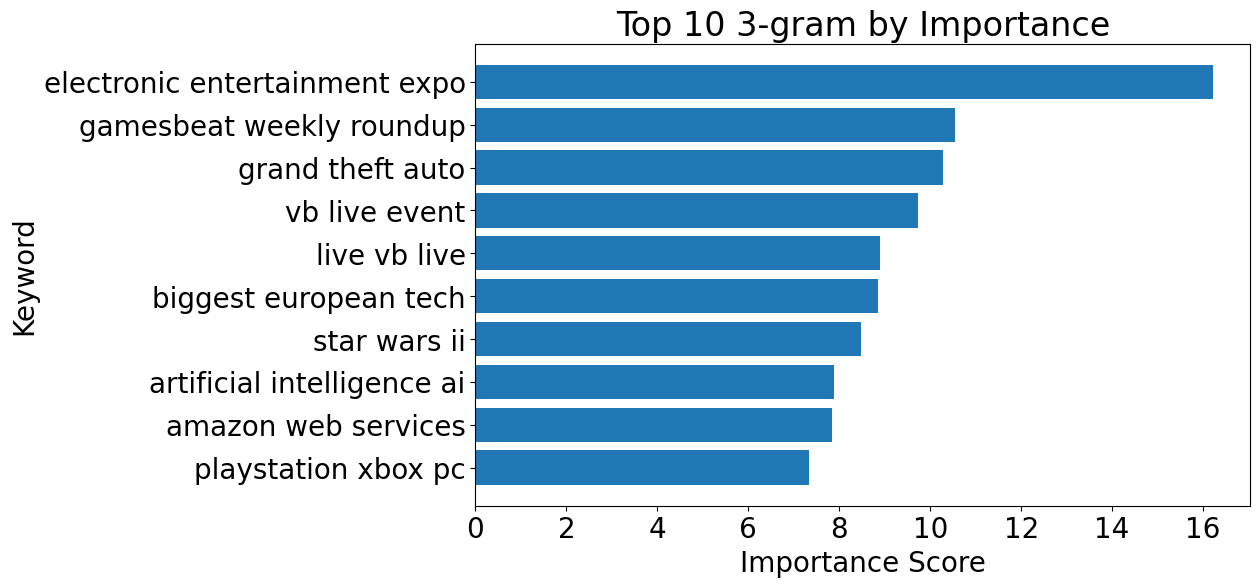

In [195]:
top_keywords= fit_tfidf(filtered_tokens, n_gram_start=3, n_gram_stop=3, min_df=0.0, max_df=1.0, top_k=10)
plot_keyword_importances(top_keywords, 10, '3-gram')